In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math

import keras
from keras import models
from keras import layers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D , SeparableConv2D, MaxPooling2D , Flatten , Dropout , BatchNormalization, Activation
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import ReduceLROnPlateau 
from keras import backend as K
from keras import optimizers
from sklearn.metrics import classification_report, recall_score, precision_score, confusion_matrix, f1_score, accuracy_score
import tensorflow as tf

In [2]:
train_data_dir = '/content/drive/MyDrive/ZahidVai/lungSegdataset/train/'
test_data_dir = '/content/drive/MyDrive/ZahidVai/lungSegdataset/test/'

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        # zoom_range=0.4,
        validation_split=0.2
        )

train_gen = train_datagen.flow_from_directory(
        directory = train_data_dir,
        target_size=(256, 256),
        batch_size=32,
        class_mode='categorical',
        subset='training'
        )
val_gen = train_datagen.flow_from_directory(
        directory = train_data_dir,
        target_size=(256, 256),
        batch_size=32,
        class_mode='categorical',
        subset='validation'
        )

Found 1323 images belonging to 2 classes.
Found 330 images belonging to 2 classes.


In [4]:
test_datagen = ImageDataGenerator(
        rescale=1./255
        )
test_gen = test_datagen.flow_from_directory(
    directory = test_data_dir,
    target_size=(256,256),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True
)

Found 94 images belonging to 2 classes.


In [ ]:
image_size = (256,256,3)

In [ ]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=image_size),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(2,activation='softmax')
])

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics = ['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 128)               3

In [ ]:
from keras.callbacks import EarlyStopping
Early_stop = EarlyStopping(monitor = 'val_acc',patience = 15)

In [ ]:
history = model.fit(train_gen, validation_data=val_gen, epochs=50, callbacks=[Early_stop])

Epoch 1/50
42/42 [==============================] - 172s 4s/step - loss: 0.8782 - acc: 0.8511 - val_loss: 0.2452 - val_acc: 0.9242
Epoch 2/50
42/42 [==============================] - 8s 188ms/step - loss: 0.1636 - acc: 0.9426 - val_loss: 0.1331 - val_acc: 0.9515
Epoch 3/50
42/42 [==============================] - 8s 188ms/step - loss: 0.1118 - acc: 0.9607 - val_loss: 0.1082 - val_acc: 0.9606
Epoch 4/50
42/42 [==============================] - 8s 189ms/step - loss: 0.0955 - acc: 0.9675 - val_loss: 0.1084 - val_acc: 0.9606
Epoch 5/50
42/42 [==============================] - 8s 186ms/step - loss: 0.0838 - acc: 0.9713 - val_loss: 0.0916 - val_acc: 0.9727
Epoch 6/50
42/42 [==============================] - 8s 186ms/step - loss: 0.0646 - acc: 0.9773 - val_loss: 0.1090 - val_acc: 0.9697
Epoch 7/50
42/42 [==============================] - 8s 188ms/step - loss: 0.0569 - acc: 0.9781 - val_loss: 0.1055 - val_acc: 0.9697
Epoch 8/50
42/42 [==============================] - 8s 185ms/step - loss: 0.0

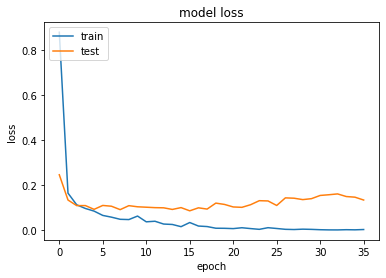

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

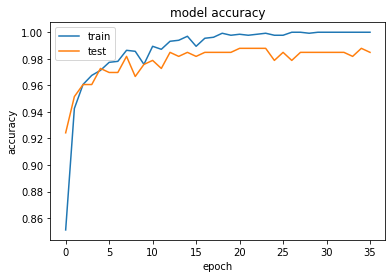

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/ZahidVai/CovidDetectionModel.h5')

In [ ]:
from keras.models import load_model

In [ ]:
Mod = load_model('/content/drive/MyDrive/ZahidVai/CovidDetectionModel.h5')

In [ ]:
image_path ='/content/drive/MyDrive/ZahidVai/lungSegdataset/test/normal/1.jpg'

In [ ]:
from keras.preprocessing import image
test_image = image.load_img(image_path, target_size = (256,256,3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = Mod.predict(test_image)
# answer = Mod.predict_classes(test_image)
answer = np.argmax(result,axis=1)
train_gen.class_indices
if result[0][0]==1:
    prediction = 'covid'
else :
    prediction = 'normal'
print(prediction)

normal


In [9]:
from keras import backend as K 
K.clear_session()

In [ ]:
img_path ='/content/drive/MyDrive/ZahidVai/lungSegdataset/test/covid/11.jpg'

In [ ]:
from keras.preprocessing import image
test_image = image.load_img(img_path, target_size = (256,256,3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = Mod.predict(test_image)
answer = np.argmax(result,axis=1)
train_gen.class_indices
if result[0][0]==1:
    prediction = 'covid'
else :
    prediction = 'normal'
print(prediction)

covid


normal xray image -> lung segmented image -> covid detection

In [22]:
import cv2 
from keras.models import load_model
import scipy.misc

img_shape = (256,256)
def transform_img(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    reshape_img = cv2.resize(img_gray,img_shape)
    return reshape_img/255.0

In [7]:
def add_mask(img,mask):
    _ , mask = cv2.threshold(mask ,0.3,1,cv2.THRESH_BINARY)
    merged = cv2.addWeighted(img, 0.7, mask.astype(np.float64), 0.3, 0)
    return merged

In [29]:
def LungSegment(temp_img,kernel = np.ones((5, 5),np.uint8)):
    K.clear_session()
    model = load_model('/content/drive/MyDrive/ZahidVai/Lung Segmentation/Better_Segment_Model.h5')
    img = cv2.imread(temp_img)
    img = transform_img(img)
    mask = model.predict(np.array([img]))
    mask_f = np.squeeze(mask[0])
    erode_img = cv2.erode(mask_f,kernel,iterations = 2)
    merged = add_mask(img,erode_img)
    plt.imshow(merged,cmap = 'gray')
    # plt.savefig()
    path = '/content/drive/MyDrive/ZahidVai/temp/segmented.jpg'
    plt.savefig(path)
    return path

In [30]:
from keras.preprocessing import image
def Detect_Covid(img):
    K.clear_session()
    Covid_model = load_model('/content/drive/MyDrive/ZahidVai/CovidDetectionModel.h5')
    
    seg_img = LungSegment(img) # Calling LungSegmentation function on test image
    
    test_image = image.load_img(seg_img, target_size = (256,256,3))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = Covid_model.predict(test_image) 
    answer = np.argmax(result,axis=1)
#     train_gen.class_indices
    if result[0][0]==1:
        prediction = 'covid'
    else :
        prediction = 'normal'
    print(prediction)

normal


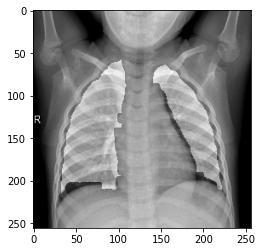

In [33]:
Detect_Covid('/content/drive/MyDrive/ZahidVai/Covid_dataset/test/normal/NORMAL2-IM-1090-0001.jpeg') 

covid


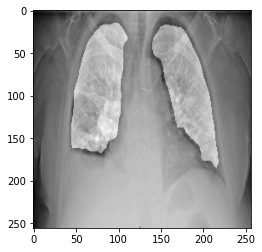

In [34]:
Detect_Covid('/content/drive/MyDrive/ZahidVai/Covid_dataset/test/covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg')